In [1]:
#potential Probability of the sales enquiries

Problem Statement:-
    
An online education institute sells courses to industry professionals. 

The company markets its courses on several websites and search engines like Google. 
Once these people land on the website, they might browse the courses or fill up a 
form providing their contact information and other details.
Once these forms are acquired, sales marketing  team start making calls, 
writing emails, etc. Through this process, some of the leads get converted while most do not. 
its lead conversion rate is very poor say 30 percent. 

If they successfully identify this set of enquiries, the sales conversion rate should go up as 
the sales team will now be focusing more on communicating with the potential clients rather 
than making calls to everyone. 

Goal :- find the potential Probability of the sales enquiries.
assign a score between 0 and 100 to target potential leads. 

A higher score would mean that the lead is hot, i.e. is most likely to convert 
whereas a lower score would mean that the lead is cold and will mostly not get converted.

Important Variables	Description
Prospect ID	A unique ID with which the customer is identified.
Lead Origin	The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
Lead Source	The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
Converted	The target variable. Indicates whether a lead has been successfully converted or not.
Time Spent on Website	The total time spent by the customer on the website.
Last Activity	Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
Specialization	The industry domain in which the customer worked before. Includes the level ‘Select Specialization’, meaning the customer had not selected this option while filling out the form.
What is your current occupation	Indicates whether the customer is a student, unemployed or employed.
City	The city of the customer.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

# Data display coustomization
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
df = pd.DataFrame(pd.read_csv('Targeting_right_customer.csv'))
df.head(5) 

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
data=df.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
# missing value

In [7]:
data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [8]:
data.isnull().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
Tags                                             3353
What matters most to you in choosing a course    2709
Lead Profile                                     2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Do Not Email                                        0
Do Not Call                 

In [9]:
high_null=data.isnull().sum()/len(data)
high_null.sort_values(ascending=False)

Lead Quality                                     0.515909
Asymmetrique Profile Score                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Index                       0.456494
Asymmetrique Activity Index                      0.456494
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
Lead Profile                                     0.293182
What is your current occupation                  0.291126
Country                                          0.266342
How did you hear about X Education               0.238853
Specialization                                   0.155628
City                                             0.153680
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Do Not Email  

Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Score                       0.456494
Asymmetrique Profile Score                      0.456494
Asymmetrique Profile Index                       0.456494

#an index and score has been assigned to each customer based to the form evaluation.

In [10]:
data=data.drop(["Asymmetrique Activity Index","Asymmetrique Profile Score","Asymmetrique Activity Score","Asymmetrique Profile Index"],axis=1)

In [11]:
data.shape

(9240, 33)

In [12]:
# no. of unique variables
for i in data.select_dtypes("O").columns:
    print(i)
    print(data[i].unique())

Prospect ID
['7927b2df-8bba-4d29-b9a2-b6e0beafe620'
 '2a272436-5132-4136-86fa-dcc88c88f482'
 '8cc8c611-a219-4f35-ad23-fdfd2656bd8a' ...
 'aac550fe-a586-452d-8d3c-f1b62c94e02c'
 '5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9'
 '571b5c8e-a5b2-4d57-8574-f2ffb06fdeff']
Lead Origin
['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source
['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email
['No' 'Yes']
Do Not Call
['No' 'Yes']
Last Activity
['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Vi

In [13]:
data.head(2)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,No,No,Email Opened


In [14]:
data=data.drop(["Prospect ID","Lead Number"],axis=1)

In [15]:
data=data.replace("Select",np.nan)

In [16]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,No,No,Email Opened


In [17]:
# BASIC EDA

In [18]:
data["Lead Origin"].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [19]:
data["Lead Origin"].isnull().sum()

0

In [20]:
data["Lead Quality"].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

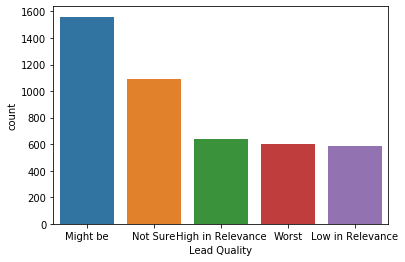

In [21]:
# lets make a bar plot
Lead_data=data["Lead Quality"].value_counts().reset_index()
Lead_data.columns=["Lead Quality","count"]

sns.barplot(x="Lead Quality",y="count",data=Lead_data)
plt.show()

In [22]:
data["Lead Quality"].isnull().sum()

4767

In [23]:
# we are not sure about the client lead quality , we should handle the missing with Not Sure

In [24]:
data["Lead Quality"]=data["Lead Quality"].replace(np.nan,"Not Sure")

In [25]:
# EDA of country

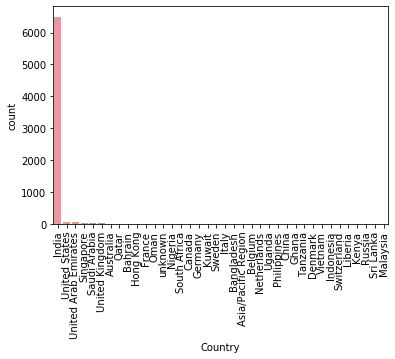

In [26]:
# lets make a bar plot
country_data=data["Country"].value_counts().reset_index()
country_data.columns=["Country","count"]
xticks(rotation=90)
sns.barplot(x="Country",y="count",data=country_data)
plt.show()

In [27]:
data["Country"].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Bahrain                 0.001033
Hong Kong               0.001033
France                  0.000885
Oman                    0.000885
unknown                 0.000738
Nigeria                 0.000590
South Africa            0.000590
Canada                  0.000590
Germany                 0.000590
Kuwait                  0.000590
Sweden                  0.000443
Italy                   0.000295
Bangladesh              0.000295
Asia/Pacific Region     0.000295
Belgium                 0.000295
Netherlands             0.000295
Uganda                  0.000295
Philippines             0.000295
China                   0.000295
Ghana                   0.000295
Tanzania                0.000148
Denmark                 0.000148
Vietnam   

In [28]:
# the country column has 95% data from India.


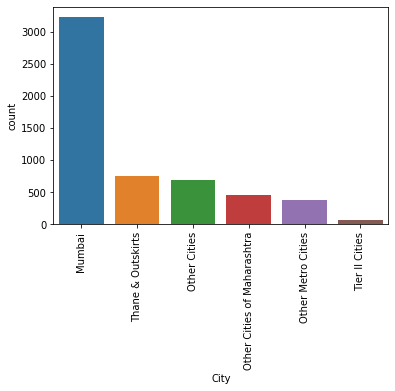

In [29]:
# lets make a bar plot
city_data=data["City"].value_counts().reset_index()
city_data.columns=["City","count"]
xticks(rotation=90)
sns.barplot(x="City",y="count",data=city_data)
plt.show()

In [30]:
data["City"].isnull().sum()

3669

In [31]:
data["City"]=data["City"].replace(np.nan,"Mumbai")

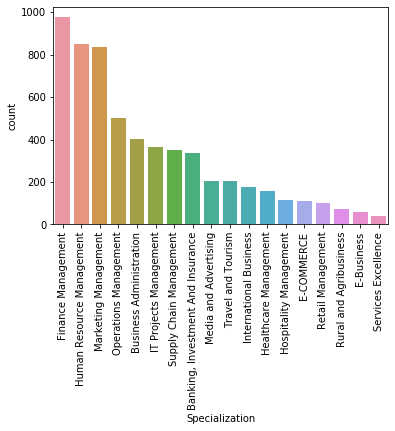

In [32]:
# lets make a bar plot
city_data=data["Specialization"].value_counts().reset_index()
city_data.columns=["Specialization","count"]
xticks(rotation=90)
sns.barplot(x="Specialization",y="count",data=city_data)
plt.show()

In [33]:
data["Specialization"].isnull().sum()

3380

In [34]:
data["Specialization"]=data["Specialization"].replace(np.nan,"Others")

In [35]:
data["Specialization"].value_counts()

Others                               3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Media and Advertising                 203
Travel and Tourism                    203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [36]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                   

In [37]:
high_null1=data.isnull().sum()/len(data)
high_null1.sort_values(ascending=False)

How did you hear about X Education               0.784632
Lead Profile                                     0.741883
Tags                                             0.362879
What matters most to you in choosing a course    0.293182
What is your current occupation                  0.291126
Country                                          0.266342
TotalVisits                                      0.014827
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Lead Source                                      0.003896
Last Notable Activity                            0.000000
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
Total Time Spent on Website                      0.000000
Specialization                                   0.000000
Magazine                                         0.000000
Search        

In [38]:
high_missing=high_null1[high_null1>0.70].index
high_missing

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [39]:
data=data.drop(high_missing,axis=1)

In [40]:
data.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                      0
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

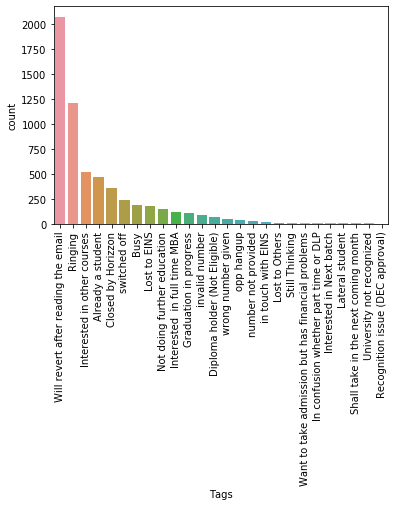

In [41]:
# lets make a bar plot
city_data=data["Tags"].value_counts().reset_index()
city_data.columns=["Tags","count"]
xticks(rotation=90)
sns.barplot(x="Tags",y="count",data=city_data)
plt.show()

In [42]:
data["Tags"]=data["Tags"].replace(np.nan,"No comments")

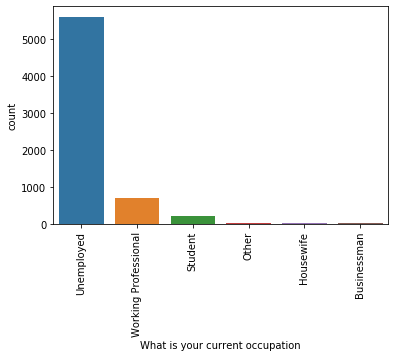

In [43]:
# lets make a bar plot
city_data=data["What is your current occupation"].value_counts().reset_index()
city_data.columns=["What is your current occupation","count"]
xticks(rotation=90)
sns.barplot(x="What is your current occupation",y="count",data=city_data)
plt.show()

In [44]:
data["What is your current occupation"]=data["What is your current occupation"].replace(np.nan,"Other")

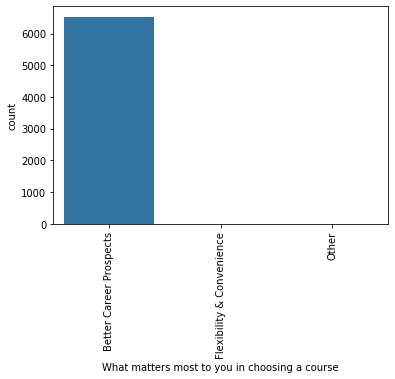

In [45]:
# lets make a bar plot
city_data=data["What matters most to you in choosing a course"].value_counts().reset_index()
city_data.columns=["What matters most to you in choosing a course","count"]
xticks(rotation=90)
sns.barplot(x="What matters most to you in choosing a course",y="count",data=city_data)
plt.show()

In [46]:
data["What matters most to you in choosing a course"]=data["What matters most to you in choosing a course"].replace(np.nan,"Other")

In [47]:
data["Country"]=data["Country"].replace(np.nan,"India")

In [48]:
data.isnull().sum()/len(data)

Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper     

In [49]:
data=data.dropna()

In [50]:
data.isnull().sum().sum()

0

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 29 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [52]:
data["Converted"].value_counts()

0    5639
1    3435
Name: Converted, dtype: int64

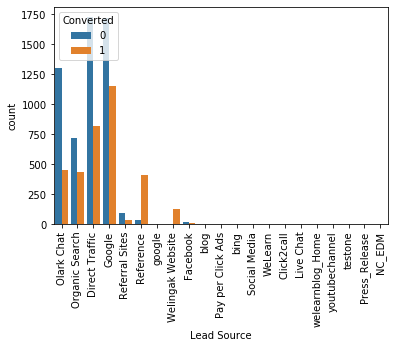

In [53]:
sns.countplot(x="Lead Source",hue="Converted",data=data)
xticks(rotation=90)
plt.show()

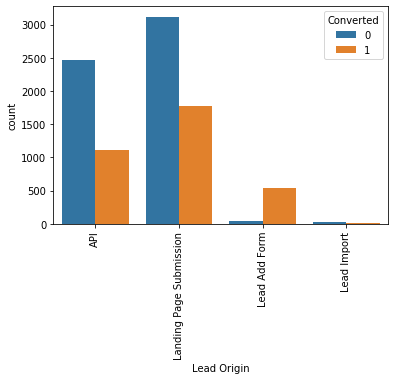

In [54]:
sns.countplot(x="Lead Origin",hue="Converted",data=data)
xticks(rotation=90)
plt.show()

### Assignment:-please complete the EDA with respect to all columns

In [55]:
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [56]:
data["Tags"].value_counts()

No comments                                          3327
Will revert after reading the email                  2016
Ringing                                              1187
Interested in other courses                           509
Already a student                                     465
Closed by Horizzon                                    301
switched off                                          240
Busy                                                  185
Lost to EINS                                          172
Not doing further education                           145
Interested  in full time MBA                          116
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    25
in touch with 

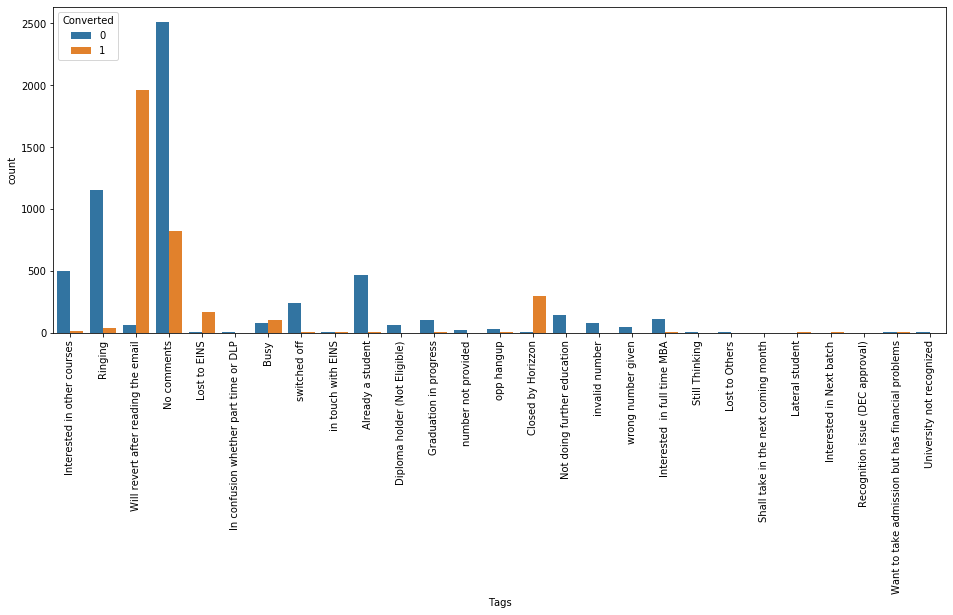

In [57]:
plt.figure(figsize=(16,6))
sns.countplot(x="Tags",data=data,hue="Converted")
xticks(rotation=90)
plt.show()

In [58]:
data10=data.copy()

In [59]:
data10["Tags"]=data10["Tags"].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given",
                                       "opp hangup","number not provided","in touch with EINS","Lost to Others",
                                       "Still Thinking","Want to take admission but has financial problems",
                                       "In confusion whether part time or DLP","Interested in Next batch",
                                       "Lateral student","Shall take in the next coming month",
                                       "University not recognized","Recognition issue (DEC approval)",
                                       "Graduation in progress"],"OTHER_COMMENT")
                                       

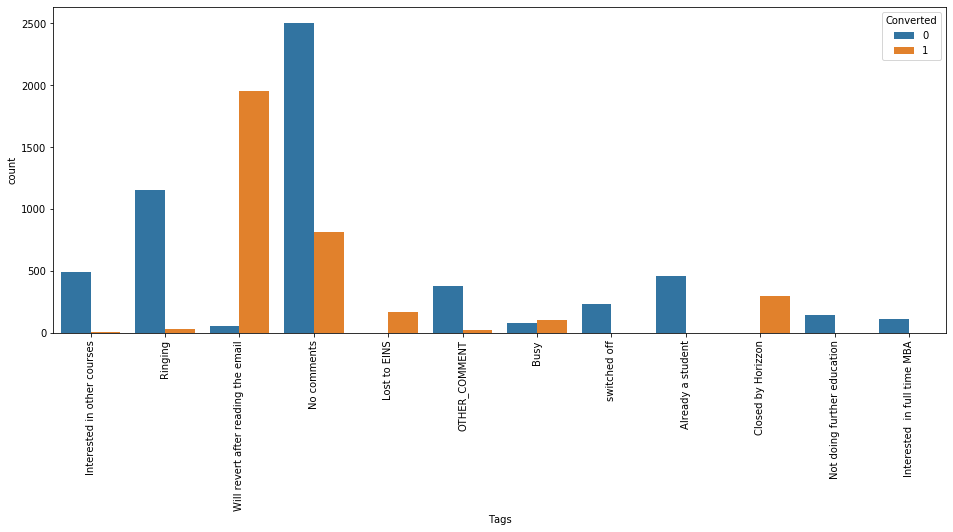

In [60]:
plt.figure(figsize=(16,6))
sns.countplot(x="Tags",data=data10,hue="Converted")
xticks(rotation=90)
plt.show()

In [61]:
data10.shape

(9074, 29)

In [62]:
data10.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Others,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened


In [63]:
# value_count function to find univariant columns
for i in data10.select_dtypes("O").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data10[i].value_counts())

#######################  

Lead Origin


Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
#######################  

Lead Source


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
NC_EDM                  1
welearnblog_Home        1
testone                 1
Pay per Click Ads       1
blog                    1
youtubechannel          1
WeLearn                 1
Name: Lead Source, dtype: int64
#######################  

Do Not Email


No     8358
Yes     716
Name: Do Not Email, dtype: int64
#######################  

Do Not Call


No     9072
Yes       2
Name: Do Not Cal

In [64]:
data20=data10.drop(["Do Not Call","Country","What matters most to you in choosing a course","Search",
                    "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                   "Through Recommendations","Receive More Updates About Our Courses",
                   "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
                   ],axis=1)

In [65]:
data20.shape

(9074, 15)

In [66]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [67]:
# map to convert two category column
data20["Do Not Email"]=data20["Do Not Email"].map({"Yes":1,"No":0})
data20["A free copy of Mastering The Interview"]=data20["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

In [68]:
#lets see the correlation matrix
corr_matrix=data20.corr(method="spearman")

In [69]:
#sns.heatmap(corr_matrix,annot=True)

In [70]:
data20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 15 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   int64  
 3   Converted                               9074 non-null   int64  
 4   TotalVisits                             9074 non-null   float64
 5   Total Time Spent on Website             9074 non-null   int64  
 6   Page Views Per Visit                    9074 non-null   float64
 7   Last Activity                           9074 non-null   object 
 8   Specialization                          9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Tags                                    9074 non-null   obje

In [71]:
# we will apply one hot encoding
data20=pd.get_dummies(columns=["Lead Origin","Lead Source","Last Activity","Specialization",
                              "What is your current occupation","Tags","Lead Quality","City",
                              "Last Notable Activity"],data=data20,drop_first=True,dtype="float")

In [72]:
data20.shape

(9074, 103)

In [73]:
data20.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,5.0,674,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2.0,1532,2.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,

In [74]:
data20=data20.drop(index=0)

In [75]:
data20.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0,5.0,674,2.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,2.0,1532,2.0,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1.0,305,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

In [76]:
# model building process
X=data20.drop(["Converted"],axis=1)
Y=data20["Converted"]

In [77]:
# scaling the dataset

In [78]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [79]:
scaler=MinMaxScaler()

In [80]:
X[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [81]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.003984,0.134243,0.018182,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [82]:
# assignment:- LOGISTIC REGREESION, rf,dt,xgb,adb...knn,svm

# ols approach

In [83]:
import statsmodels.api as sm

In [84]:
X1=sm.add_constant(X)

In [85]:
X1.head()

,const,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_No comments,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1,1.0,0,0.019920,0.296655,0.045455,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0,0.007968,0.674296,0.036364,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0,0.003984,0.134243,0.018182,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [86]:
# splitting the data into training testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y,train_size=0.8,random_state=100)

In [87]:
#logistic Regression model

In [88]:
log_model=sm.GLM(Y_train,X_train,family=sm.families.Binomial())
log_model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7158
Model Family:                Binomial   Df Model:                           99
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 05 Jun 2023   Deviance:                          nan
Time:                        19:09:01   Pearson chi2:                 4.38e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 1.548e+15   6.87e+07   2.26e+07      0.000    1.55e+15    1.55e+15
Do Not Email                                         -4.865e+14   4.23e+06  -1.15e+08      0.000   -4.86e+14   -4.86e+14
TotalVisits                                            1.76e+15   7.27e+07   2.42e+07      0.000    1.76e+15    1.76e+15
Total Time Spent on Website                           1.666e+15   4.05e+06   4.11e+08      0.000    1.67e+15    1.67e+15
Page Views Per Visit                                 -6.509e+14   3.11e+07  -2.09e+07      0.000   -6.51e+14   -6.51e+14
A free copy of Mastering The Interview               -4.617e+13   2.53e+06  -1.82e+07      0.000   -4.62e+13   -4.62e+13
Lead Origin_Landing Page Submission                  -2.562e+14   3.22e+06  -7.96e+07      0.000   -2.56e+14   -2.56e+14
Lead Origin_Lead Add Form                            -3.869e+14   3.89e+07  -9.94e+06      0.000   -3.87e+14   -3.87e+14
Lead Origin_Lead Import                               3.658e+15   6.91e+07   5.29e+07      0.000    3.66e+15    3.66e+15
Lead Source_Direct Traffic                           -5.301e+14   5.15e+07  -1.03e+07      0.000    -5.3e+14    -5.3e+14
Lead Source_Facebook                                 -4.544e+15   8.51e+07  -5.34e+07      0.000   -4.54e+15   -4.54e+15
Lead Source_Google                                   -4.723e+14   5.15e+07  -9.18e+06      0.000   -4.72e+14   -4.72e+14
Lead Source_Live Chat                                 3.437e+15   5.83e+07   5.89e+07      0.000    3.44e+15    3.44e+15
Lead Source_NC_EDM                                    4.032e+15   8.46e+07   4.77e+07      0.000    4.03e+15    4.03e+15
Lead Source_Olark Chat                               -1.683e+14   5.15e+07  -3.27e+06      0.000   -1.68e+14   -1.68e+14
Lead Source_Organic Search                           -4.599e+14   5.15e+07  -8.92e+06      0.000    -4.6e+14    -4.6e+14
Lead Source_Pay per Click Ads                        -3.473e+15   8.47e+07   -4.1e+07      0.000   -3.47e+15   -3.47e+15
Lead Source_Press_Release                            -2.832e+15   7.05e+07  -4.01e+07      0.000   -2.83e+15   -2.83e+15
Lead Source_Reference                                -6.593e+13   3.39e+07  -1.94e+06      0.000   -6.59e+13   -6.59e+13
Lead Source_Referral Sites                           -6.924e+14   5.19e+07  -1.33e+07      0.000   -6.92e+14   -6.92e+14
Lead Source_Social Media                              4.178e+15   8.48e+07   4.93e+07      0.000    4.18e+15    4.18e+15
Lead Source_WeLearn                                   3.087e+15   8.48e+07   3.64e+07      0.000    3.09e+15    3.09e+15
Lead Source_Welingak Website                          1.11

In [89]:
# Recurssive Feature elimination
from sklearn.feature_selection import RFE


In [90]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [91]:
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,Y_train)

In [92]:
rfe.support_


array([ True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True,  True, False, False,
        True,  True, False, False,  True,  True,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False])

In [93]:
col=X_train.columns[rfe.support_]
col

Index(['const', 'Total Time Spent on Website', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'What is your current occupation_Other', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_No comments',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Lead Quality_Worst',
       'Last Notable Activity_Modified'],
      dtype='object')

In [94]:
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Websit

In [95]:
X_train_sm=sm.add_constant(X_train[col])
log_model2=sm.GLM(Y_train,X_train_sm,family=sm.families.Binomial())
result=log_model2.fit()
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7258
Model:                            GLM   Df Residuals:                     7243
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1308.7
Date:                Mon, 05 Jun 2023   Deviance:                       2617.3
Time:                        19:09:11   Pearson chi2:                 1.09e+04
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -3.8777      0.203    -19.130      0.000      -4.275      -3.480
Total Time Spent on Website                  3.5701      0.218     16.373      0.000       3.143       3.998
Lead Origin_Lead Add Form                    0.9146      0.392      2.332      0.020       0.146       1.683
Lead Source_Welingak Website                 2.2905      0.832      2.753      0.006       0.660       3.921
Last Activity_SMS Sent                       2.0518      0.115     17.832      0.000       1.826       2.277
What is your current occupation_Other       -2.5035      0.141    -17.806      0.000      -2.779      -2.228
Tags_Busy                                    2.3711      0.272      8.714      0.000       1.838       2.904
Tags_Closed by Horizzon                      8.4770      0.758     11.179      0.000       6.991       9.963
Tags_Lost to EINS                            8.7912      0.590     14.906      0.000       7.635       9.947
Tags_No comments                             3.4729      0.217     16.025      0.000       3.048       3.898
Tags_Ringing                                -1.6899      0.274     -6.157      0.000      -2.228      -1.152
Tags_Will revert after reading the email     6.2262      0.245     25.409      0.000       5.746       6.706
Tags_switched off                           -2.7600      0.746     -3.699      0.000      -4.222      -1.298
Lead Quality_Worst                          -2.3850      0.656     -3.635      0.000      -3.671      -1.099
Last Notable Activity_Modified              -1.4944      0.121    -12.376      0.000      -1.731      -1.258
============================================================================================================
"""

In [96]:
# get the probability score
Y_train_predict=result.predict(X_train_sm)
Y_train_predict

3637    0.035430
3237    0.992938
5526    0.298066
4041    0.003561
858     0.019034
          ...   
368     0.051744
83      0.012096
8200    0.051906
7078    0.051744
5755    0.033885
Length: 7258, dtype: float64

In [97]:
# another approach
logreg.fit(X_train_sm,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [98]:
probability_score=logreg.predict_proba(X_train_sm)
probability_score

array([[0.93950243, 0.06049757],
       [0.01038322, 0.98961678],
       [0.70118011, 0.29881989],
       ...,
       [0.91541665, 0.08458335],
       [0.93963444, 0.06036556],
       [0.96316791, 0.03683209]])

In [99]:
pos_probability_score=logreg.predict_proba(X_train_sm)[:,1]
pos_probability_score

array([0.06049757, 0.98961678, 0.29881989, ..., 0.08458335, 0.06036556,
       0.03683209])

# continute with OLS

In [100]:
Y_train_predict=Y_train_predict.values.reshape(-1)
Y_train_predict

array([0.03542999, 0.99293819, 0.29806562, ..., 0.05190599, 0.05174398,
       0.03388456])

In [101]:
# create a datframe as per the form we have received

In [102]:
Y_train_predict_final=pd.DataFrame({"Converted":Y_train.values,"Converted_prob":Y_train_predict})
Y_train_predict_final["Customer_ID"]=Y_train.index
Y_train_predict_final.head(10)

,Converted,Converted_prob,Customer_ID
0,0,0.035430,3637
1,1,0.992938,3237
2,1,0.298066,5526
3,0,0.003561,4041
4,0,0.019034,858
5,1,0.468190,4165
6,0,0.061495,8918
7,0,0.006325,4866
8,0,0.068413,8688
9,1,0.989843,2004


In [103]:
# roc,threshold value

In [104]:
from sklearn.metrics import roc_curve,precision_recall_curve,f1_score,auc


In [105]:
fpr,tpr,thresholds_roc=roc_curve(Y_train_predict_final.Converted,Y_train_predict_final.Converted_prob)

In [106]:
precision,recall,threshold_pr=precision_recall_curve(Y_train_predict_final.Converted,Y_train_predict_final.Converted_prob)

In [107]:
#plot the roc_curve

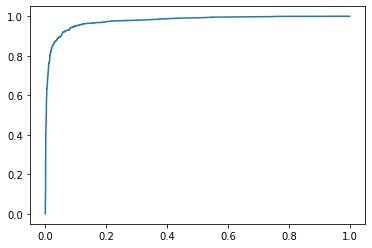

In [108]:
plt.plot(fpr,tpr,label="Roc Curve(area=%0.2f)" % auc(fpr,tpr))

In [109]:
# finding th threshold value

In [110]:
f1_scores=2*(precision*recall)/(precision+recall)
optimal_idx=np.argmax(f1_scores)
optimal_threshold=threshold_pr[optimal_idx]


In [111]:
optimal_threshold

0.38882164734394803

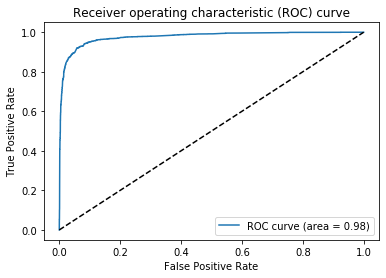

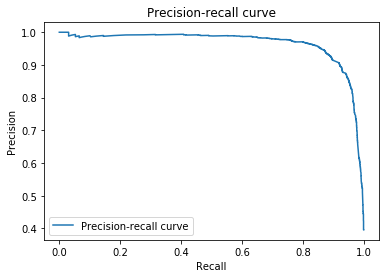

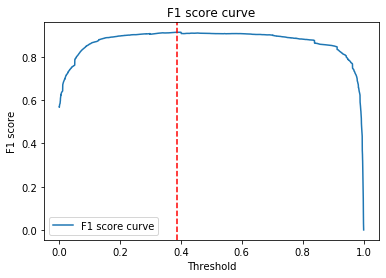

In [112]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc
import matplotlib.pyplot as plt

# assuming y_true and y_pred are the true and predicted binary labels
fpr, tpr, thresholds_roc = roc_curve( Y_train_predict_final.Converted, Y_train_predict_final.Converted_prob)

precision, recall, thresholds_pr = precision_recall_curve( Y_train_predict_final.Converted, Y_train_predict_final.Converted_prob)

# calculate F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
#plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

# plot precision-recall curve
plt.plot(recall, precision, label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

# plot F1 score curve
plt.plot(thresholds_pr, f1_scores[:-1], label='F1 score curve')
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc="lower left")
plt.show()

In [113]:
Y_train_predict_final["Final_prediction"]=Y_train_predict_final.Converted_prob.map(lambda x:1 if x>0.4 else 0)

In [114]:
Y_train_predict_final.head()

,Converted,Converted_prob,Customer_ID,Final_prediction
0,0,0.035430,3637,0
1,1,0.992938,3237,1
2,1,0.298066,5526,0
3,0,0.003561,4041,0
4,0,0.019034,858,0


In [115]:
Y_train_predict_final["enquiry_score"]=Y_train_predict_final.Converted_prob.map(lambda x: round(x*100))

In [116]:
Y_train_predict_final.head()

,Converted,Converted_prob,Customer_ID,Final_prediction,enquiry_score
0,0,0.035430,3637,0,4
1,1,0.992938,3237,1,99
2,1,0.298066,5526,0,30
3,0,0.003561,4041,0,0
4,0,0.019034,858,0,2


In [117]:
# lets segregate the clients or enquiry.. which are Hot, Cold, Potential..

In [118]:
def decide_enquiry_quality(probability,hot_threshold=0.70,cold_threshold=0.30):
    if probability>= hot_threshold:
        return "Most Imp enquiry"
    elif probability<cold_threshold:
        return "COLD CASE"
    else:
        return "POTENTAIL CLIENT"

In [119]:
Y_train_predict_final["Enquiry quality"]=Y_train_predict_final["Converted_prob"].apply(decide_enquiry_quality)

In [120]:
Y_train_predict_final

,Converted,Converted_prob,Customer_ID,Final_prediction,enquiry_score,Enquiry quality
0,0,0.035430,3637,0,4,COLD CASE
1,1,0.992938,3237,1,99,Most Imp enquiry
2,1,0.298066,5526,0,30,COLD CASE
3,0,0.003561,4041,0,0,COLD CASE
4,0,0.019034,858,0,2,COLD CASE
...,...,...,...,...,...,...
7253,0,0.051744,368,0,5,COLD CASE
7254,0,0.012096,83,0,1,COLD CASE
7255,0,0.051906,8200,0,5,COLD CASE
7256,0,0.051744,7078,0,5,COLD CASE


In [121]:
from sklearn.metrics import classification_report,accuracy_score

In [122]:
print(classification_report(Y_train_predict_final.Converted,Y_train_predict_final.Final_prediction))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      4519
           1       0.91      0.92      0.91      2739

    accuracy                           0.93      7258
   macro avg       0.93      0.93      0.93      7258
weighted avg       0.93      0.93      0.93      7258



In [123]:
# assignment -- please do the same(probability score) for test data set also

In [124]:
#you can apply all other algorithms--- DT,RF,KNN,SVM,CAT BOOST,XGB